<a href="https://colab.research.google.com/github/McPetzka/What-s-in-my-food/blob/main/Origins_of_my_dinner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set_style

<function seaborn.rcmod.set_style>

In [10]:
food = pd.read_json('train.json')


In [25]:
# Raw data examintation

food.head()

,id,cuisine,ingredients,nr,combined
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,black pepper shallots cornflour cayenne pepper...


In [12]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


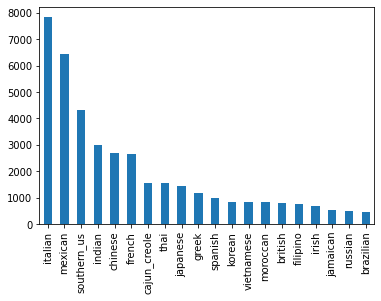

In [26]:
# Amount of recipes per cuisine

food["cuisine"].value_counts().plot(kind = 'bar')

In [27]:
#Ratio of recipes per cuisine

food.cuisine.value_counts() / len(food),

(italian         0.197063
 mexican         0.161865
 southern_us     0.108614
 indian          0.075502
 chinese         0.067205
 french          0.066526
 cajun_creole    0.038870
 thai            0.038694
 japanese        0.035777
 greek           0.029542
 spanish         0.024865
 korean          0.020868
 vietnamese      0.020742
 moroccan        0.020642
 british         0.020214
 filipino        0.018982
 irish           0.016770
 jamaican        0.013225
 russian         0.012294
 brazilian       0.011741
 Name: cuisine, dtype: float64,)

Wordclouds with most popularr ingredients worldwide and per specific cuisine

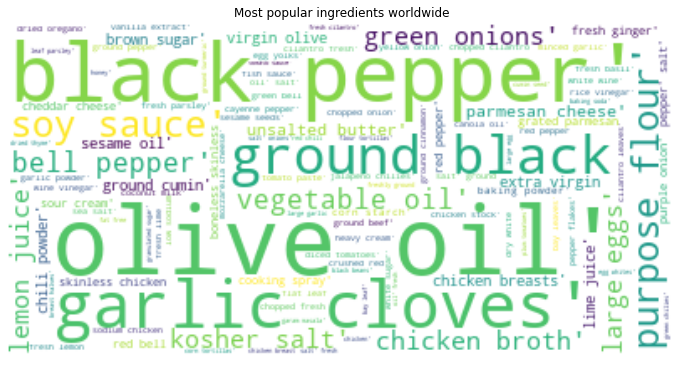

In [16]:


from wordcloud import WordCloud

text = " ".join(str(ing) for ing in food.ingredients)
wordcloud =WordCloud(max_words= 600, background_color="white").generate(text)
plt.figure(figsize= (12,9))
plt.title('Most popular ingredients worldwide')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



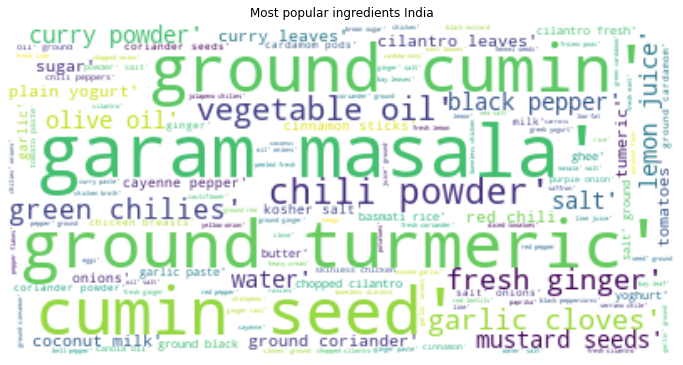

In [17]:
from wordcloud import WordCloud

text = " ".join(str(ing) for ing in food[food['cuisine']=='indian'].ingredients)
wordcloud =WordCloud(max_words= 600, background_color="white").generate(text)
plt.figure(figsize= (12,9))
plt.title('Most popular ingredients India')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

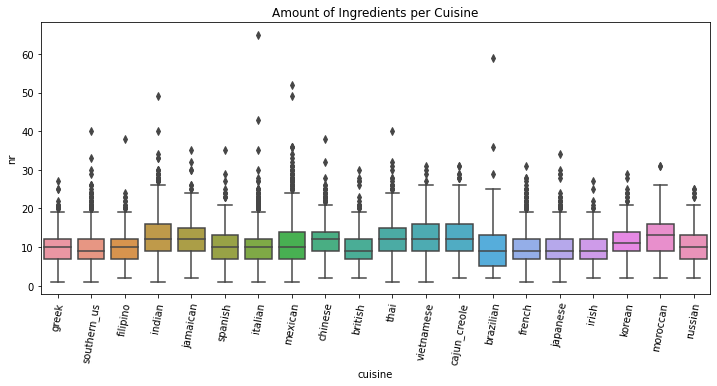

In [28]:
# Ingredients amount per cuisine

food['nr'] = food.ingredients.map(lambda x: len(x))
plt.figure(figsize=(12,5))
plt.title('Amount of Ingredients per Cuisine')
ax = sns.boxplot(x="cuisine", y="nr", data=food)
plt.xticks(rotation=80)
plt.show()

Multinomial Naive Bayes- classification model

In [19]:
food['combined']= food.ingredients.map(lambda x: ' '.join(x))
new_food= food[['cuisine', 'combined']]
new_food.head()

,cuisine,combined
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X = count_vect.fit_transform(new_food.combined)
X = tfidf_transformer.fit_transform(X)
X.shape

(39774, 3010)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

clf = MultinomialNB()
scores = cross_val_score(clf, X, new_food.cuisine, cv=5)
print('accuracy CV:',scores)

accuracy CV: [0.66976744 0.6778127  0.66172219 0.67089881 0.67362333]
